### Tree Based Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

import pydotplus  ### need to install
import graphviz ### need to install and add path to env
from IPython.display import Image

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
#general function for printing tree
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [3]:
df = pd.read_csv('Data/Hitters.csv').dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    f

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


### Graph the data

In [4]:
X = np.array(df[['Years', 'Hits']])
y = np.log(df['Salary'])
print(X)
print(y)

[[ 14  81]
 [  3 130]
 [ 11 141]
 [  2  87]
 [ 11 169]
 [  2  37]
 [  3  73]
 [  2  81]
 [ 13  92]
 [ 10 159]
 [  9  53]
 [  4 113]
 [  6  60]
 [ 13  43]
 [ 15 158]
 [  5  46]
 [  8  32]
 [  1  92]
 [  1 109]
 [  6 116]
 [ 18 168]
 [  6 163]
 [  7  73]
 [ 10 129]
 [  5 152]
 [ 14 137]
 [  3 108]
 [  5 168]
 [  7  49]
 [ 14 106]
 [  2  60]
 [  2  41]
 [  4  46]
 [  6  68]
 [  3 132]
 [  5  57]
 [  6 146]
 [ 17 101]
 [  2  53]
 [  9 168]
 [ 12 101]
 [  6 102]
 [  4  58]
 [ 12  78]
 [  6 177]
 [  1 113]
 [ 16  44]
 [  4  56]
 [  4  53]
 [ 17 139]
 [  3  53]
 [  4 142]
 [ 17  81]
 [ 14 131]
 [ 18 122]
 [ 15 137]
 [  9 119]
 [  4  97]
 [  6 103]
 [  4  96]
 [ 15  70]
 [  5 238]
 [ 11 163]
 [  9  83]
 [ 14 174]
 [  2  82]
 [ 16  41]
 [  4 114]
 [  5  83]
 [  4 123]
 [  1  78]
 [  3 138]
 [ 12 119]
 [ 14 148]
 [  3 115]
 [  7 110]
 [ 10 151]
 [  8  49]
 [ 14 154]
 [  5 198]
 [  1  51]
 [ 14 128]
 [  5  76]
 [ 13 125]
 [  3 152]
 [  6 171]
 [  4 118]
 [ 16  77]
 [  9  94]
 [  8  85]
 [ 15  96]

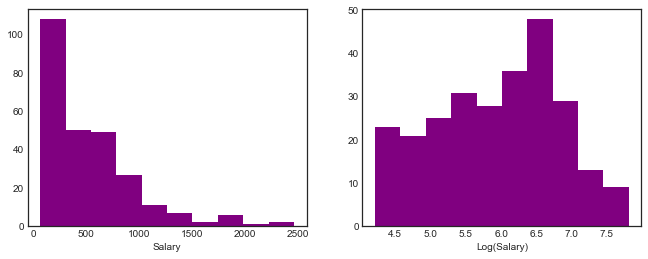

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df['Salary'], color="purple")
ax1.set_xlabel('Salary')
ax2.hist(y, color="purple")
ax2.set_xlabel('Log(Salary)');

### Decision Tree Regression

In [6]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

In [7]:
regr.score(X,y)
#r2 score

0.5591199525164692

### Plot the Tree and graph

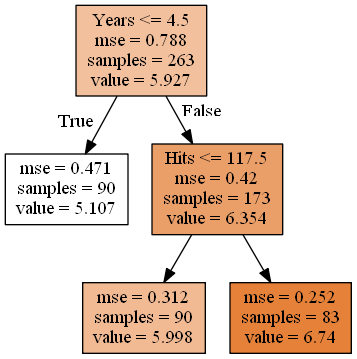

In [9]:
graph = print_tree(regr, features=['Years', 'Hits'])

# Show graph
Image(graph.create_png())

Question
1. What do mse, samples and value mean in the decision tree graph printed above?
2. What are the predictors and response variable in this example?

#### Question 1 Ans:

The mean square error (mse) refers to total squared difference between the estimated value and the actual value while the samples refer to the samples matching either criteria and value is the label or the log(salary) in this case.

#### Question 2 Ans:

The predictors are years and hits and the response variable is the value.

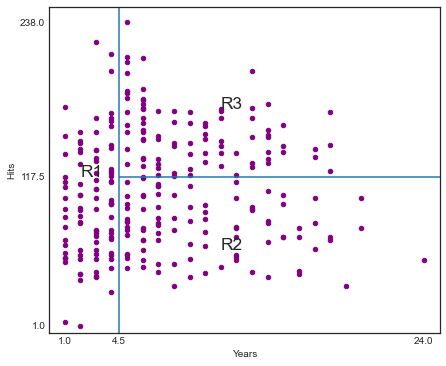

In [11]:
df.plot('Years', 'Hits', kind='scatter', color='purple', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

Text(0, 0.5, 'actual')

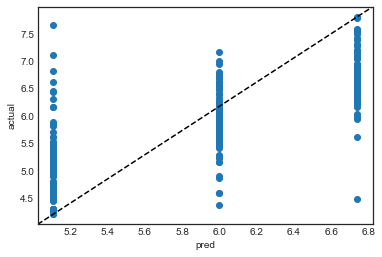

In [12]:
pred = regr.predict(X)
plt.scatter(pred, y)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes) #draws the dotted line
plt.xlabel('pred')
plt.ylabel('actual') #the response variable y

In [13]:
mean_squared_error(y, pred)

0.34726215856106474

In [14]:
# check invidivual prediction, what are the values used as input and predicted?
# X = np.array(df[['Years', 'Hits']])

prd_R1 = regr.predict([[ 3,  81]])
prd_R2 = regr.predict([[ 14,  81]])
prd_R3 = regr.predict([[ 14,  120]])

print(np.exp(prd_R1))
print(np.exp(prd_R2))
print(np.exp(prd_R3))

[165.1393406]
[402.77570648]
[845.29605091]


### Questions
1. For the above code, what are the values used as input?
1. How accurate is the prediction? What is the actual value?
1. What is the prediction value for play with 2 years experience and 120 hits?

- The years and hits
- Quite accurate considering the low MSE.
- Answer is print below

In [15]:
prd = regr.predict([[ 2,  120]])
print(np.exp(prd))

[165.1393406]


### Classification Tree 

In [16]:
df2 = pd.read_csv('Data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [17]:
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]
X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]
X2.head()
y2

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int6

In [18]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2,y2)

# score returns the accuracy of the prediction: the percentage of correct
# classifications if it's a two-class classification problem
clf.score(X2,y2)

0.797979797979798

In [19]:
#print the classification report of the training data (in this case)
y2pred=clf.predict(X2)
print(classification_report(y2, y2pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       160
           1       0.79      0.76      0.78       137

    accuracy                           0.80       297
   macro avg       0.80      0.80      0.80       297
weighted avg       0.80      0.80      0.80       297



In [20]:
#print(confusion_matrix(y2, y2pred))
#fancy way below
cm = pd.DataFrame(confusion_matrix(y2, y2pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,133,33
Yes,27,104


### Graph Classification tree

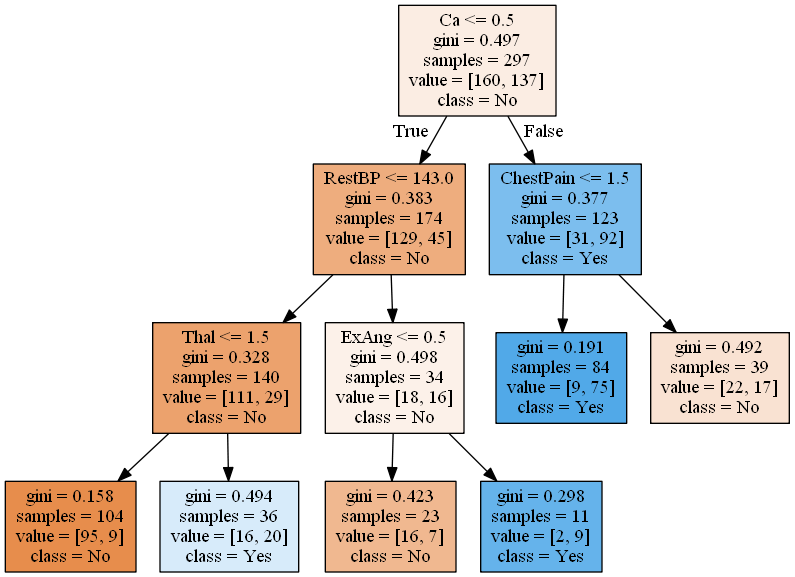

In [21]:
graph2 = print_tree(clf, features=X2.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())

### Questions
1. What do gini, samples, value and class mean in the decision tree graph printed above?
2. What are the predictors and response variable in this example?

- Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen. The degree of Gini index varies between 0 and 1, where 0 denotes that all elements belong to a certain class or if there exists only one class, and 1 denotes that the elements are randomly distributed across various classes. A Gini Index of 0.5 denotes equally distributed elements into some classes. A feature with a lower Gini index is chosen for a split.
- Samples are the number of observations in each node. 
- Value is the count of observations for each class.
- Class is the class representing each node.

## <p style="color:red;">Task 7: Question 1 (2 marks)</p>
Create a decision tree regressor for the data Carseats.csv, the data consist of  simulated data set containing sales of child car seats at 400 different stores. You may have to clean up the data abit, and map the 'Yes','No' into 0 and 1. You can use this command, for example:
```
df.Urban = df3.Urban.map({'No':0, 'Yes':1})
```

Separate the data into training and test. You also need to factorize ShelveLoc. 
1. Print out the MSE value for both training and test dataset. 
1. Print out the regression decision tree graph. 
1. Print out also the scatter plot of Y and Predicted Y.

In [9]:
df3 = pd.read_csv('Data/Carseats.csv').dropna() # reads the csv file and drops NA values
df3.drop("Unnamed: 0", axis=1, inplace=True) # drops Unnamed column
df3.info() # summary of dataframe
df3.head() # shows first 5 of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]

In [31]:
df3.Urban = df3.Urban.map({"Yes":1, "No":0})
df3.US = df3.US.map({"Yes":1, "No":0})

In [32]:
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [76]:
X3 = df3.drop("Sales", axis=1)
y3 = df3.Sales
X3.head()
y3

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

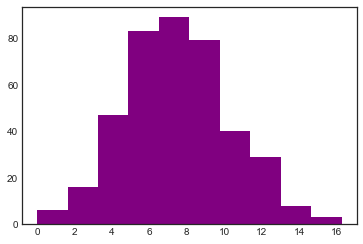

In [77]:
plt.hist(df3['Sales'], color="purple")

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, train_size=0.8) # 80/20 train test split
feature_names = list(X3.columns)

In [79]:
regr2 = DecisionTreeRegressor(max_leaf_nodes=len(feature_names)+1)
regr2.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=11)

In [81]:
pred2 = regr2.predict(X_train)

In [82]:
mean_squared_error(y_train, pred2)

3.1797843565155612

In [83]:
pred3 = regr2.predict(X_test)

In [84]:
mean_squared_error(y_test, pred3)

4.0911948205128414

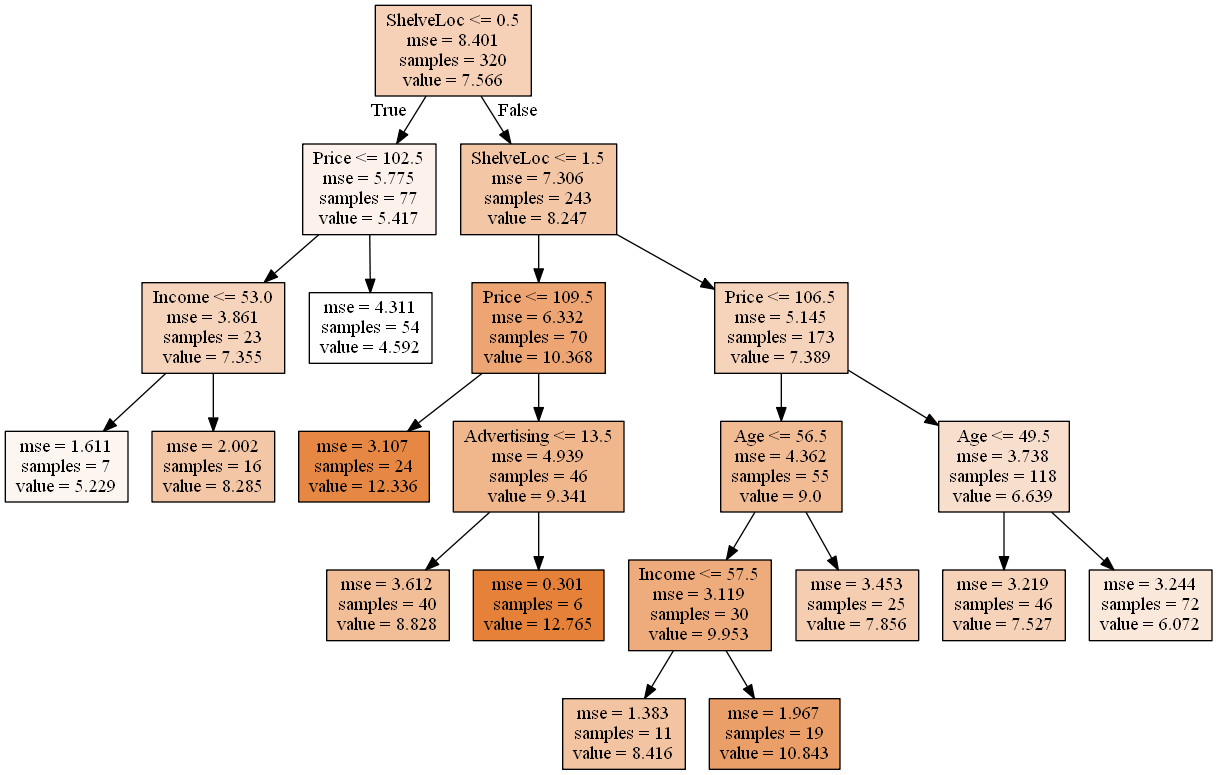

In [85]:
graph = print_tree(regr2, features=feature_names)

# Show graph
Image(graph.create_png())

Text(0, 0.5, 'actual')

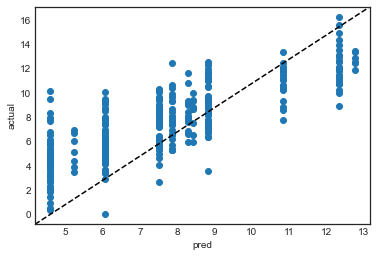

In [86]:
pred = regr2.predict(X_train)
plt.scatter(pred, y_train)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes) #draws the dotted line
plt.xlabel('pred')
plt.ylabel('actual')

Text(0, 0.5, 'actual')

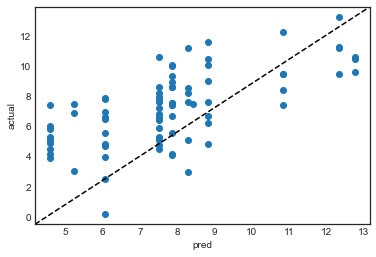

In [87]:
pred = regr2.predict(X_test)
plt.scatter(pred, y_test)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes) #draws the dotted line
plt.xlabel('pred')
plt.ylabel('actual')

## <p style="color:red;">Task 7: Question 2 (2 marks)</p>
Using the same Carseats.csv data set, convert the problem into a Classification problem. Create a new column that maps the sales to High the value is greater than 8. You can use this:

```
f3['High'] = df2.Sales.map(lambda x: 1 if x>8 else 0)
```
Map columsn Urban and US into 1 or 0 as well. Create a train and test split on the dataset. Run it through a decision tree classifier.

1. Print the classification report
1. Print confusion matrix
1. Print the decision tree graph

In [54]:
df4 = pd.read_csv('Data/Carseats.csv').drop("Unnamed: 0", axis=1).dropna() # reads the csv file and drops NA values
df4.info() # summary of dataframe
df4.head() # shows first 5 of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [55]:
df4['High'] = df4.Sales.map(lambda x: 1 if x>8 else 0)
df4.ShelveLoc = pd.factorize(df4.ShelveLoc)[0]
df4.Urban = df4.Urban.map({"Yes":1, "No":0})
df4.US = df4.US.map({"Yes":1, "No":0})

In [56]:
df4.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [69]:
X4 = df4.drop(["Sales", "High"], axis=1)
y4 = df4.High
X4.head()
y4

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, train_size=0.8) # 80/20 train test split

clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [71]:
y4pred=clf.predict(X_train)
print(classification_report(y_train, y4pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76       183
           1       0.67      0.80      0.73       137

    accuracy                           0.74       320
   macro avg       0.75      0.75      0.74       320
weighted avg       0.76      0.74      0.75       320



In [72]:
y4pred2=clf.predict(X_test)
print(classification_report(y_test, y4pred2))

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        53
           1       0.47      0.74      0.57        27

    accuracy                           0.62        80
   macro avg       0.64      0.65      0.62        80
weighted avg       0.69      0.62      0.63        80



In [74]:
cm = pd.DataFrame(confusion_matrix(y_train, y4pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,129,28
Yes,54,109


In [75]:
cm = pd.DataFrame(confusion_matrix(y_test, y4pred2).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,30,7
Yes,23,20


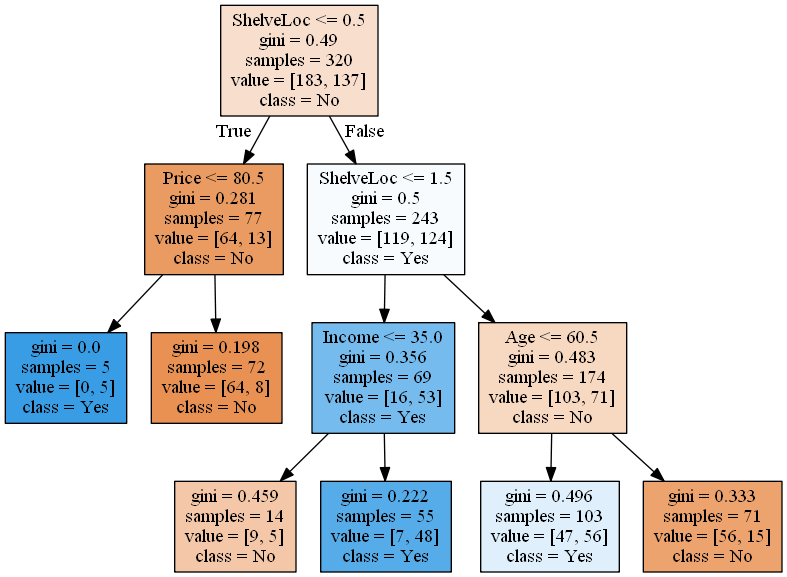

In [88]:
graph2 = print_tree(clf, features=X4.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())